In [28]:
#importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import cv2
%matplotlib inline
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from keras.models import Model
from keras.layers import Flatten,Dense
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import matplotlib.pyplot as plot
from glob import glob
import scipy as sc
from scipy import misc
from keras.models import load_model
from keras.layers import Dense, Embedding, LSTM, GRU, Flatten, Dropout, Lambda
from tensorflow.keras.preprocessing.image import load_img
from keras_preprocessing import image
import PIL
from PIL import Image
from keras.models import Sequential
from tensorflow_addons.optimizers import AdamW

In [2]:

tf.test.gpu_device_name()

''

**IMPORTING DATA**

In [3]:
IMAGESHAPE = [224, 224, 3] 
test_set=r"D:\archive\chest_xray\chest_xray\test"
training_set=r"D:\archive\chest_xray\chest_xray\train"

In [4]:
vgg19_model = VGG19(input_shape=IMAGESHAPE, weights='imagenet', include_top=False)

In [5]:
#making all layer trainable
for each_layer in vgg19_model.layers:
   each_layer.trainable = True

In [6]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
classes = glob(r"D:\archive\chest_xray\chest_xray\train\*") 

In [8]:
#making the layer in one dimension 
flatten_layer = Flatten()(vgg19_model.output)
prediction = Dense(len(classes), activation='softmax')(flatten_layer)

In [9]:
final_model = Model(inputs=vgg19_model.input, outputs=prediction) 
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
#compiling
final_model.compile( 
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
#image preprocessing and augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
testing_datagen = ImageDataGenerator(rescale =1. / 255)

In [12]:
training_set = train_datagen.flow_from_directory(r"D:\archive\chest_xray\chest_xray\train", 
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [13]:
test_set = testing_datagen.flow_from_directory(r"D:\archive\chest_xray\chest_xray\test",
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

Found 624 images belonging to 2 classes.


# Rnning the model for epoochs

In [14]:
fitted_model = final_model.fit( 
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)    
)





Epoch 1/40
163/163 [==============================] - 1989s 12s/step - loss: 2.0025 - accuracy: 0.7331 - val_loss: 0.6719 - val_accuracy: 0.6250
Epoch 2/40
163/163 [==============================] - 1984s 12s/step - loss: 0.5622 - accuracy: 0.7458 - val_loss: 0.5370 - val_accuracy: 0.7500
Epoch 3/40
163/163 [==============================] - 1980s 12s/step - loss: 0.5895 - accuracy: 0.7504 - val_loss: 0.6690 - val_accuracy: 0.6250
Epoch 4/40
163/163 [==============================] - 1992s 12s/step - loss: 0.3153 - accuracy: 0.8627 - val_loss: 0.6045 - val_accuracy: 0.7724
Epoch 5/40
163/163 [==============================] - 1978s 12s/step - loss: 0.2229 - accuracy: 0.9076 - val_loss: 0.3424 - val_accuracy: 0.8622
Epoch 6/40
163/163 [==============================] - 1988s 12s/step - loss: 0.2142 - accuracy: 0.9141 - val_loss: 0.3335 - val_accuracy: 0.8654
Epoch 7/40
163/163 [==============================] - 1991s 12s/step - loss: 0.1977 - accuracy: 0.9202 - val_loss: 0.3321 - val_ac

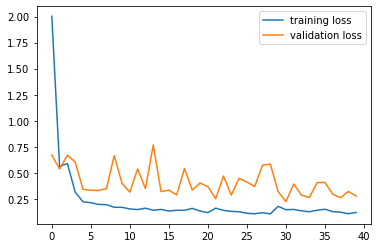

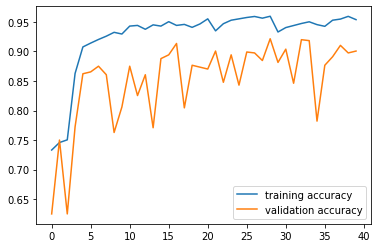

In [15]:
plot.plot(fitted_model.history['loss'], label='training loss') #Plotting the accuracies
plot.plot(fitted_model.history['val_loss'], label='validation loss')
plot.legend()
plot.show()

plot.plot(fitted_model.history['accuracy'], label='training accuracy')
plot.plot(fitted_model.history['val_accuracy'], label='validation accuracy')
plot.legend()
plot.show()

In [16]:
final_model.save('vgg19.h5')

In [17]:
model=load_model('vgg19.h5') #Loading our model
img=image.load_img(r"D:\archive\chest_xray\chest_xray\train\PNEUMONIA\person1_bacteria_1.jpeg",target_size=(224,224))
imagee=image.img_to_array(img) #Converting the X-Ray into pixels
imagee=np.expand_dims(imagee, axis=0)
img_data=preprocess_input(imagee)
prediction=model.predict(img_data)
if prediction[0][0]>prediction[0][1]:  #Printing the prediction of model.
    print('Person is safe.')
else:
    print('Person is affected with Pneumonia.')
print(f'Predictions: {prediction}')

1/1 [==============================] - 0s 278ms/step
Person is affected with Pneumonia.
Predictions: [[0. 1.]]


In [24]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
   r"D:\archive\chest_xray\chest_xray\test", 
     target_size=(224,224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 55s 3s/step


In [25]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [29]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

      NORMAL       0.52      0.72      0.60       234
   PNEUMONIA       0.78      0.59      0.68       390

    accuracy                           0.64       624
   macro avg       0.65      0.66      0.64       624
weighted avg       0.68      0.64      0.65       624

